## Setup

In [30]:
%run setup.ipynb
# %matplotlib inline
# rcParams['figure.dpi'] = 120
# rcParams['figure.facecolor'] = 'w'
import hapclust
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import pandas as pd
# import numpy as np

cartopy 0.17.0


In [31]:
df_samples = phase2_ar1.df_samples
df_samples.rename(columns={"location":"region"}, inplace=True)
df_haplotypes['region'] = df_haplotypes['region'].str.replace('Gado-Badzere', "Gado Badzere")
df_haplotypes['region'] = df_haplotypes['region'].str.replace('Zembe-Borongo', "Zembe Borongo")
df_samples.columns

Index(['src_code', 'population', 'country', 'region', 'site', 'contributor',
       'contact', 'year', 'm_s', 'sex', 'n_sequences', 'mean_coverage',
       'ebi_sample_acc', 'latitude', 'longitude'],
      dtype='object')

In [32]:
df_samples

,src_code,population,country,region,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
ox_code,,,,,,,,,,,,,,,
AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397
AA0048-C,Madina_A1,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,101183648,32.64,ERS311942,5.66849,-0.21928
AA0049-C,Madina_E3,GHcol,Ghana,Madina,Madina,David Weetman,David Weetman,2012,M,F,106641272,32.84,ERS311950,5.66849,-0.21928
AA0050-C,Madina_E5,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,93961924,29.82,ERS311958,5.66849,-0.21928
AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,99910300,33.33,ERS311871,5.60858,-1.54926


In [33]:
df_haplotypes = pd.read_csv('../phase2.AR1/haplotypes/haplotypes.autosomes.meta.txt', sep='\t')
df_haplotypes['region'] = df_haplotypes['region'].str.replace('_', " ")
df_haplotypes['region'] = df_haplotypes['region'].str.replace('Gado-Badzere', "Gado Badzere")
df_haplotypes['region'] = df_haplotypes['region'].str.replace('Zembe-Borongo', "Zembe Borongo")
df_haplotypes.head()

,Unnamed: 0,label,ox_code,population,label_aug,country,region,sex,m_s
0,0,AA0040-Ca,AA0040-C,GHcol,"AA0040-Ca [Ghana, Twifo_Praso, M F]",Ghana,Twifo Praso,F,M
1,1,AA0040-Cb,AA0040-C,GHcol,"AA0040-Cb [Ghana, Twifo_Praso, M F]",Ghana,Twifo Praso,F,M
2,2,AA0041-Ca,AA0041-C,GHcol,"AA0041-Ca [Ghana, Twifo_Praso, M F]",Ghana,Twifo Praso,F,M
3,3,AA0041-Cb,AA0041-C,GHcol,"AA0041-Cb [Ghana, Twifo_Praso, M F]",Ghana,Twifo Praso,F,M
4,4,AA0042-Ca,AA0042-C,GHcol,"AA0042-Ca [Ghana, Takoradi, M F]",Ghana,Takoradi,F,M


In [34]:
# use the network membership to define haplotype groups
vgsc_clusters = np.load('../data/median_joining_network_membership.npy').astype('U')
clust_dict = {(l if l else 'wt'): set(np.nonzero(vgsc_clusters == l)[0]) 
              for l in np.unique(vgsc_clusters)}


In [35]:
clust_dict.keys()

dict_keys(['wt', 'F1', 'F2', 'F3', 'F4', 'F5', 'FX', 'S1', 'S2', 'S3', 'S4', 'S5', 'SX'])

In [36]:
# merge the "other resistant" groups
clust_dict['other_resistant'] = clust_dict['FX'] | clust_dict['SX']
del clust_dict['FX']
del clust_dict['SX']

In [37]:
clust_dict.keys()

dict_keys(['wt', 'F1', 'F2', 'F3', 'F4', 'F5', 'S1', 'S2', 'S3', 'S4', 'S5', 'other_resistant'])

In [38]:
#using different clusterings/files

# with open('../data/clust_dict.pickle', 'rb') as handle:
#     clust_dict = peterpickedapickledpepper.load(handle)


# vgsc_clusters = np.load('../data/vgsc_cluster_membership.npy').astype('U')
# clust_dict = {(l if l else 'wt'): set(np.nonzero(vgsc_clusters == l)[0]) for l in np.unique(vgsc_clusters)}


# with open('../data/core_haps.pkl', mode='rb') as f:
#     clust_dict = pickle.load(f)
# core_haps_simple = dict()
# fx = set()
# sx = set()
# lx = set()
# wt = set()
# for k, v in clust_dict.items():
#     if k.startswith('FX'):
#         fx |= v
#     elif k.startswith('SX'):
#         sx |= v
#     elif k.startswith('LX'):
#         lx |= v
#     elif k.startswith('WT'):
#         wt |= v
#     else:
#         core_haps_simple[k] = v
# core_haps_simple['FX'] = fx
# core_haps_simple['SX'] = sx
# core_haps_simple['LX'] = lx
# core_haps_simple['WT'] = wt
# clust_dict = core_haps_simple

In [39]:
hap_labels = sorted(clust_dict)
# reorder for aesthetics
hap_labels = (
    [l for l in hap_labels if l.startswith('F')] +
    [l for l in hap_labels if l.startswith('S')] +
#     [l for l in hap_labels if l.startswith('L')] +
    ['other_resistant', 'wt']
)
hap_labels

['F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'other_resistant',
 'wt']

In [40]:
phase2_ar1.pop_labels

{'AOcol': 'Angola $coluzzii$',
 'BFcol': 'Burkina Faso $coluzzii$',
 'GHcol': 'Ghana $coluzzii$',
 'CIcol': "Côte d'Ivoire $coluzzii$",
 'GNcol': 'Guinea $coluzzii$',
 'GW': 'Guinea-Bissau',
 'GM': 'The Gambia',
 'GNgam': 'Guinea $gambiae$',
 'BFgam': 'Burkina Faso $gambiae$',
 'GHgam': 'Ghana $gambiae$',
 'CMgam': 'Cameroon $gambiae$',
 'UGgam': 'Uganda $gambiae$',
 'GAgam': 'Gabon $gambiae$',
 'GQgam': 'Bioko $gambiae$',
 'FRgam': 'Mayotte $gambiae$',
 'KE': 'Kenya',
 'colony': 'colony'}

In [43]:
def make_df_pops():
    global df_pops

    tbl_pops = (
        etl
        .wrap([
            ['pop', 'long_label', 'short_label', 'query'],
            ['AOcol', 'Angola $coluzzii$', 'AO$Ac$', 'population == "AOcol"'],
            ['GHcol', 'Ghana $coluzzii$', 'GH$Ac$', 'population == "GHcol"'],
            ['BFcol', 'Burkina Faso $coluzzii$', 'BF$Ac$', 'population == "BFcol"'],
            ['CIcol', "Côte d'Ivoire $coluzzii$", 'CI$Ac$', 'population == "CIcol"'],
            ['GNcol', "Guinea $coluzzii$", 'GN$Ac$', 'population == "GNcol"'],
            ['CMgam', 'Cameroon $gambiae$', 'CM$Ag$', 'population == "CMgam"'],
            ['CMgam_savanna', 'Cameroon (savanna) $gambiae$', 'CM$Ag$', 'population == "CMgam" and (region == "Gado Badzere" or region == "Zembe Borongo")'],
            ['CMgam_transition', 'Cameroon (transition) $gambiae$', '', 'population == "CMgam" and region == "Daiguene"'],
            ['CMgam_forest', 'Cameroon (forest) $gambiae$', '', 'population == "CMgam" and region == "Mayos"'],
            ['GHgam', 'Ghana $gambiae$', 'GH$Ag$', 'population == "GHgam"'], 
            ['BFgam', 'Burkina Faso $gambiae$', 'BF$Ag$', 'population == "BFgam"'],
            ['GNgam', 'Guinea $gambiae$', 'GN$Ag$', 'population == "GNgam"'],
            ['GW', 'Guinea-Bissau', 'GW', 'population == "GW"'],
            ['GM', 'The Gambia', 'GM', 'population == "GM"'],
            ['GAgam', 'Gabon $gambiae$', 'GA$Ag$', 'population == "GAgam"'],
            ['UGgam', 'Uganda $gambiae$', 'UG$Ag$', 'population == "UGgam"'],
            ['FRgam', 'Mayotte $gambiae$', 'FR$Ag$', 'population == "FRgam"'],
            ['GQgam', 'Bioko $gambiae$', 'GQ$Ag$', 'population == "GQgam"'],
            ['KE', 'Kenya', 'KE', 'population == "KE"'],      
        ])
        .addfield('latitude', lambda row: df_samples.query(row.query).latitude.mean())
        .addfield('longitude', lambda row: df_samples.query(row.query).longitude.mean())
        .addfield('n_haps', lambda row: len(df_haplotypes.query(row.query)))
    )

    df_pops = tbl_pops.todataframe()
    df_pops = df_pops.set_index('pop')
    
    
make_df_pops()
df_pops

,long_label,short_label,query,latitude,longitude,n_haps
pop,,,,,,
AOcol,Angola $coluzzii$,AO$Ac$,"population == ""AOcol""",-8.821000,13.291000,156
GHcol,Ghana $coluzzii$,GH$Ac$,"population == ""GHcol""",5.377246,-1.317371,110
BFcol,Burkina Faso $coluzzii$,BF$Ac$,"population == ""BFcol""",11.222600,-4.461400,150
CIcol,Côte d'Ivoire $coluzzii$,CI$Ac$,"population == ""CIcol""",5.898390,-4.822930,142
GNcol,Guinea $coluzzii$,GN$Ac$,"population == ""GNcol""",8.500000,-9.417000,8
CMgam,Cameroon $gambiae$,CM$Ag$,"population == ""CMgam""",4.936394,13.936182,594
CMgam_savanna,Cameroon (savanna) $gambiae$,CM$Ag$,"population == ""CMgam"" and (region == ""Gado Bad...",5.747000,14.442000,192
CMgam_transition,Cameroon (transition) $gambiae$,,"population == ""CMgam"" and region == ""Daiguene""",4.777000,13.844000,192
CMgam_forest,Cameroon (forest) $gambiae$,,"population == ""CMgam"" and region == ""Mayos""",4.341000,13.558000,210


In [44]:
crs_lonlat = ccrs.PlateCarree()
ratios = np.asarray([0.5, 0.5])
sum(ratios)

1.0

## Calculate haplotype frequencies across populations

In [45]:
def compute_hap_freqs():
    global df_freqs
    
    n_pops = len(df_pops)
    n_haps = len(hap_labels)
    hap_frequencies = np.zeros([n_pops, n_haps], dtype=int)

    # then loop through clusters
    for i, pop in enumerate(df_pops.index):
        pop_query = df_pops.loc[pop].query
        pop_hap_ixs = set(df_haplotypes.query(pop_query).index.values)
        for j, label in enumerate(hap_labels):
            core_hap_ixs = clust_dict[label]
            isec = pop_hap_ixs.intersection(core_hap_ixs)
            hap_frequencies[i, j] = len(isec)


    counts = df_pops.n_haps
    counts

    # make df for plotting
    df_freqs = pd.DataFrame(data=hap_frequencies, index=df_pops.index, columns=hap_labels)
    df_freqs['other'] = counts - df_freqs.sum(axis=1).values
    df_freqs['total'] = counts
    
compute_hap_freqs()
df_freqs

,F1,F2,F3,F4,F5,S1,S2,S3,S4,S5,other_resistant,wt,other,total
pop,,,,,,,,,,,,,,
AOcol,111,0,0,0,0,0,0,0,0,0,20,25,0,156
GHcol,90,0,0,0,0,0,0,0,0,0,0,20,0,110
BFcol,123,0,0,0,0,0,0,0,0,0,5,22,0,150
CIcol,125,0,0,0,0,0,0,0,0,0,5,12,0,142
GNcol,6,0,0,0,0,0,0,0,0,0,1,1,0,8
CMgam,28,13,55,23,159,0,8,0,37,42,40,189,0,594
CMgam_savanna,2,3,29,12,40,0,1,0,11,14,16,64,0,192
CMgam_transition,15,5,18,5,57,0,4,0,10,12,13,53,0,192
CMgam_forest,11,5,8,6,62,0,3,0,16,16,11,72,0,210


In [46]:
# test CMS breakdown is significant
def test_cms_breakdown():
    arr = np.asarray(df_freqs
                     .loc[['CMgam_savanna', 'CMgam_transition', 'CMgam_forest']]
                     .iloc[:, :len(hap_labels) + 1])
    # remove zeros
    arr = arr.compress(arr.sum(axis=0) > 0, axis=1)
    return scipy.stats.chi2_contingency(arr)

test_cms_breakdown()

(37.903481675425965,
 0.0039888456078261,
 18,
 array([[ 9.05050505,  4.2020202 , 17.77777778,  7.43434343, 51.39393939,
          2.58585859, 11.95959596, 13.57575758, 12.92929293, 61.09090909],
        [ 9.05050505,  4.2020202 , 17.77777778,  7.43434343, 51.39393939,
          2.58585859, 11.95959596, 13.57575758, 12.92929293, 61.09090909],
        [ 9.8989899 ,  4.5959596 , 19.44444444,  8.13131313, 56.21212121,
          2.82828283, 13.08080808, 14.84848485, 14.14141414, 66.81818182]]))

## build matplotlib pies - use colours from original dendrogram

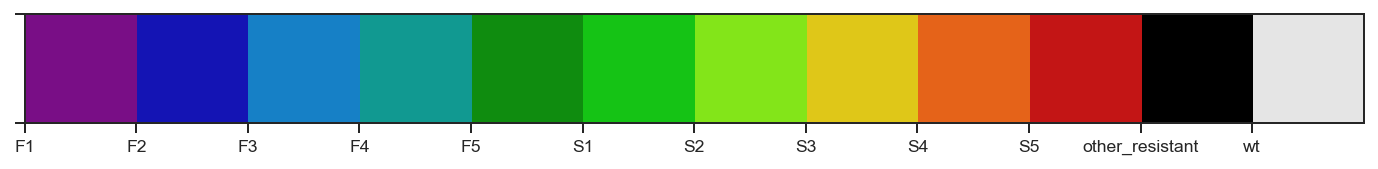

In [47]:
palette = sns.color_palette('nipy_spectral', n_colors=len(hap_labels) - 2, desat=0.8)
# add a colour for other_resistant
palette.append((0, 0, 0))
# add a colour for wt 
palette.append((0.9, 0.9, 0.9))
# check
sns.palplot(palette)
plt.gca().set_xticklabels(hap_labels);

In [48]:
df_pops

,long_label,short_label,query,latitude,longitude,n_haps
pop,,,,,,
AOcol,Angola $coluzzii$,AO$Ac$,"population == ""AOcol""",-8.821000,13.291000,156
GHcol,Ghana $coluzzii$,GH$Ac$,"population == ""GHcol""",5.377246,-1.317371,110
BFcol,Burkina Faso $coluzzii$,BF$Ac$,"population == ""BFcol""",11.222600,-4.461400,150
CIcol,Côte d'Ivoire $coluzzii$,CI$Ac$,"population == ""CIcol""",5.898390,-4.822930,142
GNcol,Guinea $coluzzii$,GN$Ac$,"population == ""GNcol""",8.500000,-9.417000,8
CMgam,Cameroon $gambiae$,CM$Ag$,"population == ""CMgam""",4.936394,13.936182,594
CMgam_savanna,Cameroon (savanna) $gambiae$,CM$Ag$,"population == ""CMgam"" and (region == ""Gado Bad...",5.747000,14.442000,192
CMgam_transition,Cameroon (transition) $gambiae$,,"population == ""CMgam"" and region == ""Daiguene""",4.777000,13.844000,192
CMgam_forest,Cameroon (forest) $gambiae$,,"population == ""CMgam"" and region == ""Mayos""",4.341000,13.558000,210


In [49]:
def make_df_lonlat():
    global df_lonlat
    df_lonlat = df_pops[['latitude', 'longitude']].copy()
    df_lonlat['offset_latitude'] = np.zeros(len(df_lonlat))
    df_lonlat['offset_longitude'] = np.zeros(len(df_lonlat))
    df_lonlat.loc['BFgam'].offset_latitude = 2
    df_lonlat.loc['BFgam'].offset_longitude = 2
    df_lonlat.loc['BFcol'].offset_latitude = 2
    df_lonlat.loc['BFcol'].offset_longitude = -2
    df_lonlat.loc['CMgam_savanna'].offset_latitude = 3.5
    df_lonlat.loc['CMgam_savanna'].offset_longitude = 0.5
    df_lonlat.loc['CMgam_transition'].offset_latitude = 0.5
    df_lonlat.loc['CMgam_transition'].offset_longitude = 3
    df_lonlat.loc['CMgam_forest'].offset_latitude = -3
    df_lonlat.loc['CMgam_forest'].offset_longitude = 1
    df_lonlat.loc['GAgam'].offset_latitude = .5
    df_lonlat.loc['GAgam'].offset_longitude = -3

make_df_lonlat()
df_lonlat

,latitude,longitude,offset_latitude,offset_longitude
pop,,,,
AOcol,-8.821000,13.291000,0.0,0.0
GHcol,5.377246,-1.317371,0.0,0.0
BFcol,11.222600,-4.461400,2.0,-2.0
CIcol,5.898390,-4.822930,0.0,0.0
GNcol,8.500000,-9.417000,0.0,0.0
CMgam,4.936394,13.936182,0.0,0.0
CMgam_savanna,5.747000,14.442000,3.5,0.5
CMgam_transition,4.777000,13.844000,0.5,3.0
CMgam_forest,4.341000,13.558000,-3.0,1.0


In [ ]:
# #make lonlat offsets, label position exceptions 
# df['offset_lon'] = np.zeros(len(df))
# df['offset_lat'] = np.zeros(len(df))
# df['label'] = 'top'

# #ghana
# df.loc[df['pop'] == 'Ghana', 'offset_lat'] = -3
# df.loc[df['pop'] == 'Ghana', 'offset_lon'] = 0
# #BF
# df.loc[df['pop'] == 'Burkina Faso', 'offset_lat'] = 3
# df.loc[df['pop'] == 'Burkina Faso', 'offset_lon'] = 2
# df.loc[df['pop'] == 'Burkina Faso', 'label'] = 'bottom'
# #Uganda
# df.loc[df['pop'] == 'Uganda', 'offset_lat'] = 3
# df.loc[df['pop'] == 'Uganda', 'offset_lon'] = 0
# df.loc[df['pop'] == 'Uganda', 'label'] = 'bottom'
# #Gambia
# df.loc[df['pop'] == 'Gambia, The', 'offset_lat'] = 1
# df.loc[df['pop'] == 'Gambia, The', 'offset_lon'] = -3
# df.loc[df['pop'] == 'Gambia, The', 'label'] = 'bottom'
# #GB
# df.loc[df['pop'] == 'Guinea-Bissau', 'offset_lat'] = -2
# df.loc[df['pop'] == 'Guinea-Bissau', 'offset_lon'] = -2
# #Kenya
# df.loc[df['pop'] == 'Kenya', 'offset_lat'] = -1
# df.loc[df['pop'] == 'Kenya', 'offset_lon'] = 2
# df.loc[df['pop'] == 'Kenya', 'label'] = 'bottom'
# #Cam
# df.loc[df['pop'] == 'Cameroon', 'offset_lat'] = 3
# df.loc[df['pop'] == 'Cameroon', 'offset_lon'] = 3
# df.loc[df['pop'] == 'Cameroon', 'label'] = 'bottom'
# #mayotte
# df.loc[df['pop'] == 'France', 'offset_lat'] = 2
# df.loc[df['pop'] == 'France', 'offset_lon'] = -1
# df.loc[df['pop'] == 'France', 'label'] = 'bottom'
# #Equatorial Guinea
# df.loc[df['pop'] == 'Equatorial Guinea', 'offset_lat'] = -1
# df.loc[df['pop'] == 'Equatorial Guinea', 'offset_lon'] = -2
# #df.loc[df['pop'] == 'Equatorial Guinea', 'label'] = 'bottom'
# #Angola
# df.loc[df['pop'] == 'Angola', 'offset_lat'] = 0
# df.loc[df['pop'] == 'Angola', 'offset_lon'] = -3
# #Gabon
# # df.loc[df['pop'] == 'Gabon', 'offset_lat'] = -1.5
# # df.loc[df['pop'] == 'Gabon', 'offset_lon'] = 3
# df.loc[df['pop'] == 'Gabon', 'offset_lat'] = -2
# df.loc[df['pop'] == 'Gabon', 'offset_lon'] = -2.5
# #Guinea
# df.loc[df['pop'] == 'Guinea', 'offset_lat'] = 2
# df.loc[df['pop'] == 'Guinea', 'offset_lon'] = -1
# df.loc[df['pop'] == 'Guinea', 'label'] = 'bottom'
# #Guinea
# df.loc[df['pop'] == 'Guinea', 'offset_lat'] = 2
# df.loc[df['pop'] == 'Guinea', 'offset_lon'] = -1
# #Cote
# df.loc[df['pop'] == "Cote d'Ivoire", 'offset_lat'] = 2
# df.loc[df['pop'] == "Cote d'Ivoire", 'offset_lon'] = 0
# df.loc[df['pop'] == "Cote d'Ivoire", 'label'] = 'bottom'

In [50]:
# for legend
hap_colors = {l: c for l, c in zip(hap_labels, palette)}
hap_colors

{'F1': (0.47488509803921597, 0.05869215686274509, 0.5282294117647058),
 'F2': (0.07882686274509798, 0.07882686274509798, 0.7094417647058824),
 'F3': (0.08667000000000002, 0.5039405882352944, 0.78003),
 'F4': (0.06667000000000001, 0.60003, 0.5686417647058825),
 'F5': (0.061306862745098, 0.5517617647058823, 0.061306862745098),
 'S1': (0.08536215686274506, 0.7682594117647059, 0.08536215686274506),
 'S2': (0.5140988235294116, 0.9, 0.09999999999999998),
 'S3': (0.8752817647058824, 0.781164117647059, 0.09725352941176468),
 'S4': (0.9, 0.39176470588235296, 0.09999999999999998),
 'S5': (0.7682594117647059, 0.08536215686274506, 0.08536215686274506),
 'other_resistant': (0, 0, 0),
 'wt': (0.9, 0.9, 0.9)}

In [52]:
pops_cms_whole = [p for p in df_pops.index if p not in {'CMgam_savanna', 'CMgam_transition', 'CMgam_forest'}]
pops_cms_whole

['AOcol',
 'GHcol',
 'BFcol',
 'CIcol',
 'GNcol',
 'CMgam',
 'GHgam',
 'BFgam',
 'GNgam',
 'GW',
 'GM',
 'GAgam',
 'UGgam',
 'FRgam',
 'GQgam',
 'KE']

In [53]:
pops_cms_breakdown = [p for p in df_pops.index if p != 'CMgam']
pops_cms_breakdown

['AOcol',
 'GHcol',
 'BFcol',
 'CIcol',
 'GNcol',
 'CMgam_savanna',
 'CMgam_transition',
 'CMgam_forest',
 'GHgam',
 'BFgam',
 'GNgam',
 'GW',
 'GM',
 'GAgam',
 'UGgam',
 'FRgam',
 'GQgam',
 'KE']

In [54]:
human_hap_labels = {k: k for k in hap_labels}
human_hap_labels['other_resistant'] = 'other $kdr$'
human_hap_labels['wt'] = '$wt$'

In [55]:
def plot_map(pops, fn=None, dpi=150):

    #our frame
    extent_lonlat = (-20, 45, -13, 20)

    #plot
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120, subplot_kw=subplot_kw)
    ax.coastlines(resolution='50m', linewidth=1, zorder=1)
    ax.stock_img()
    ax.add_feature(cfeature.BORDERS, lw=1, zorder=4)
    ax.add_feature(cfeature.LAKES)
    #ax.margins(0)

    #add pies
    for pop, row in df_lonlat.loc[pops].iterrows():
        freqs = df_freqs.loc[pop]
        ratios = np.asarray([freqs[k]/freqs['total'] for k in hap_labels])
        ratios = np.append(ratios, 1 - np.sum(ratios))
        # wedgeprops is used here just to pass the zorder command
        center = (row.longitude + row.offset_longitude, row.latitude + row.offset_latitude)
        radius = np.sqrt(df_freqs.loc[pop].total * .02)
        ax.pie(ratios, wedgeprops=dict(zorder=7), colors=palette, 
               center=center, radius=radius, shadow=True)
        ax.add_patch(plt.Circle(xy=center, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=1))
        if row.offset_latitude > 0 or row.offset_longitude > 0:
            ax.plot([row.longitude, row.longitude + row.offset_longitude],
                    [row.latitude, row.latitude + row.offset_latitude], 'k-', lw=2)
        lbl = df_pops.loc[pop].short_label
        ax.text(center[0], center[1] + radius, lbl, ha='center', va='bottom', fontsize=8, fontweight='bold', 
                bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)

    ax.set_extent(extent_lonlat, crs=crs_lonlat)

    handles = [mpl.patches.Patch(facecolor=hap_colors[k], edgecolor='k', label=human_hap_labels[k]) for k in hap_labels]
    leg = ax.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', title='Haplotype\ngroup', )
    leg._legend_box.align = "left"
    
    #save
    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight')
    

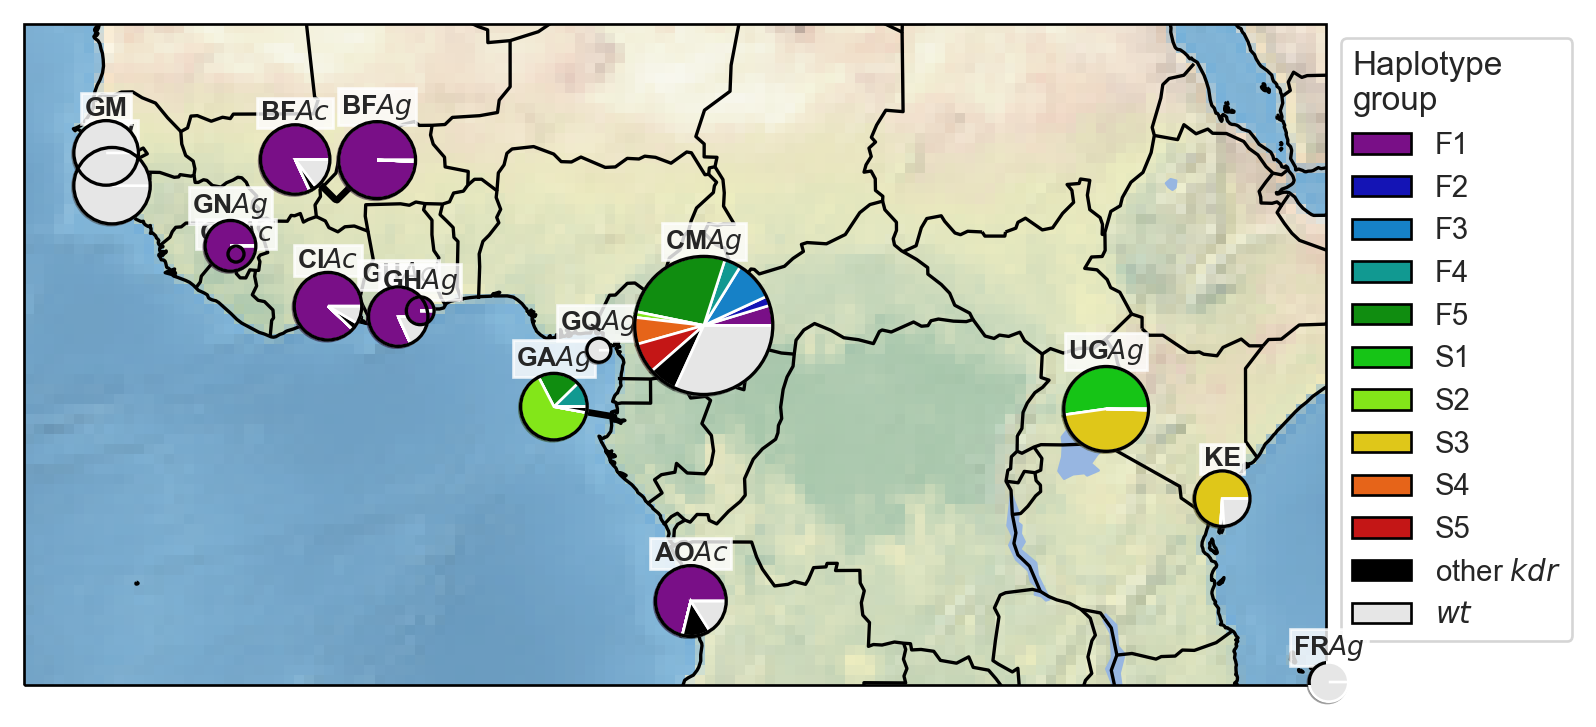

In [57]:
plot_map(pops=pops_cms_whole)

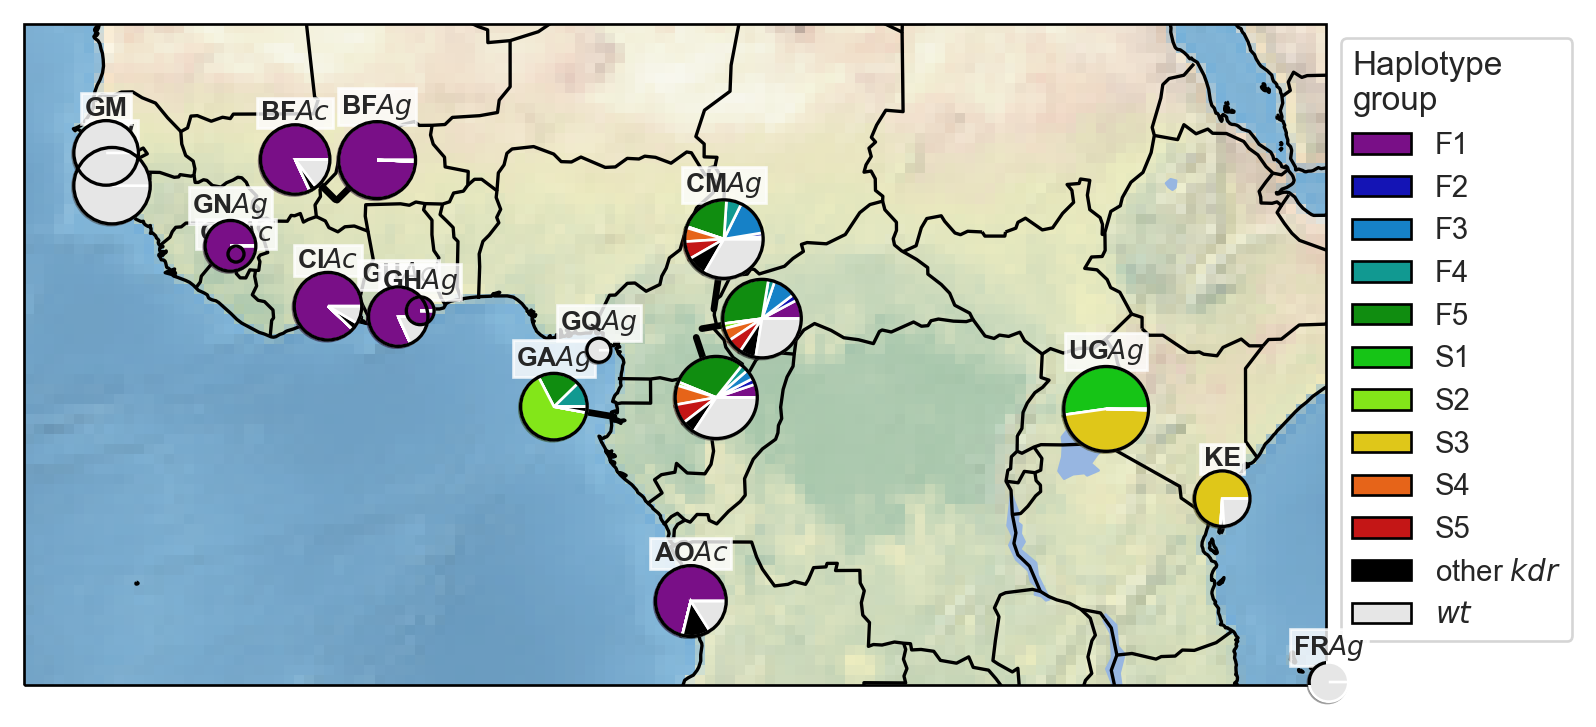

In [58]:
plot_map(pops=pops_cms_breakdown, fn='../artwork/outbreak_map_base_cms_breakdown.pdf')